# Autoregression from scratch with real sample data
$y(t) = b_0 + \sum_{i=1}^{lag} b_i*y(t-i)$

- 結果が破綻する
- たぶんSGDの定義は悪い?
- いや、学習率が大きかっただけかも

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from AR import AutoRegression

In [2]:
data = pd.read_csv('monthly-sunspots.csv')

## training

In [3]:
lags = 130
lr = 10**-6

model = AutoRegression(lags = lags)
train_data = data['Sunspots'][:2600].values
y_trained = model.training(train_data, alpha = lr, epoch = 10)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(train_data[lags:], y_trained))
rmse

RMSE = []
for i in range(1, len(train_data)):
    RMSE.append(sqrt(mean_squared_error(train_data[lags:i+lags], y_trained[:i])))
plt.plot(RMSE)

In [4]:
test_data = data['Sunspots'][2600:].values
history = data['Sunspots'][2600-lags:2600].values
y_pred = model.prediction(test_data = test_data, history = history)

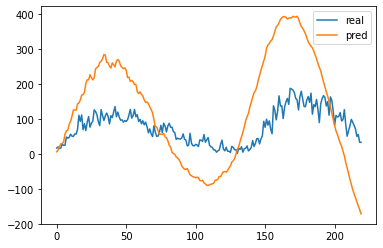

In [8]:
plt.plot(test_data, label='real')
plt.plot(y_pred, label='pred')
plt.legend()